<a href="https://colab.research.google.com/github/12345997/rough-copy-wk9/blob/main/WEEK_9_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict wine quality based on the given physicochemical tests.

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [6]:
#importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [7]:
# Loading the Data from the source i.e. csv
# ---
train=pd.read_csv("/content/test (1).csv")
test=pd.read_csv("/content/train (5).csv")
# ---
#



## 3. Checking the Data

In [8]:
# Determining the no. of records in our dataset
print(train.shape)
print((test.shape))

(418, 11)
(891, 12)


In [9]:
# Previewing the top of our dataset
#
print("TRAIN DATA")
print(train.head())

print(train.tail())
print("*****************************************************************************************")


TRAIN DATA
   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]
     PassengerId  Pclass                          Name  ...      Fare  Cabin  Embarked
413         1305       3            Spector, Mr. Woolf  ...    8.0500    NaN         S
414         1306       1  Oliva y Ocana, Dona. Fermina  ...  108.9000   C105         C
415         1307       3  Saether, Mr. Simon Sivertsen  ...    7.2500    NaN         S
416         1308       3           Ware, Mr. Frederick  ...    8.0500    NaN         S
417         1309       3      Peter, Master. Michael J  ...   22.3583    NaN         C

[5 rows x 11 columns]
*****************************************************************************************


In [10]:
# Previewing the bottom of our dataset
# 
print("TEST DATA")

print(test.head())

print(test.tail())

TEST DATA
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
     PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]


In [11]:
# Checking whether each column has an appropriate datatype
#
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [12]:
# Checking for Outliers
#
# Using the IQR formula
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).sum()

Age             2
Cabin           0
Embarked        0
Fare           55
Name            0
Parch          94
PassengerId     0
Pclass          0
Sex             0
SibSp          11
Ticket          0
dtype: int64

In [13]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
# Checking for Anomalies
#

In [14]:
# Identifying the Missing Data
#
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
#filling the missing Values in item "age" with the mean value of the column
train["Age"].fillna(train["Age"].mean(), inplace=True)

In [16]:
train["Fare"].fillna(train["Fare"].mean(), inplace=True)

In [17]:
train.drop(["Cabin"],axis=1, inplace=True)

In [18]:
train.drop(["PassengerId"],axis=1, inplace=True)


In [19]:
# Dealing with the Missing Data
#
train.duplicated().sum()

0

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [21]:
train.drop(["Name","Ticket","Embarked"],axis=1, inplace=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [124]:
#train["Sex"] = np.where(train["Sex"].str.contains("ohc"), 1, 0)

## 6. Exploratory Analysis

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [53]:
# Summary Statistics for the Numerical Variables
train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,12.634534,0.896760,0.981429,55.840500
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [57]:
# Mean
mean1 = train['Pclass'].mean()
print("The mean for the Pclass is: ", mean1)
mean2 = train['Age'].mean()
print("The mean for the Age is: ", mean2)
mean3 = train['SibSp'].mean()
print("The mean for the SibSp is: ", mean3)
mean4 = train['Parch'].mean()
print("The mean for the Parch is: ", mean4)
mean4 = train['Fare'].mean()
print("The mean for the Fare is: ", mean4)

The mean for the Pclass is:  2.2655502392344498
The mean for the Age is:  30.272590361445815
The mean for the SibSp is:  0.4473684210526316
The mean for the Parch is:  0.3923444976076555
The mean for the Fare is:  35.6271884892086


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


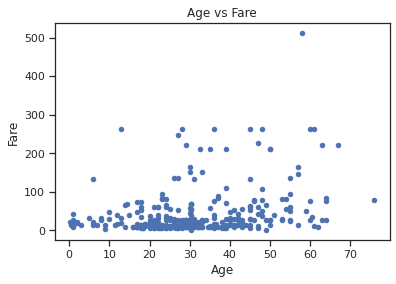

In [59]:
# Scatter Plot between Price and Sales
train.plot(x = 'Age', y = 'Fare', kind='scatter')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


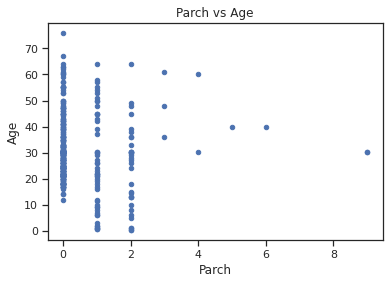

In [60]:
# Scatter Plot between Price and Sales
train.plot(x = 'Parch', y = 'Age', kind='scatter')
plt.title('Parch vs Age')
plt.xlabel('Parch')
plt.ylabel('Age')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


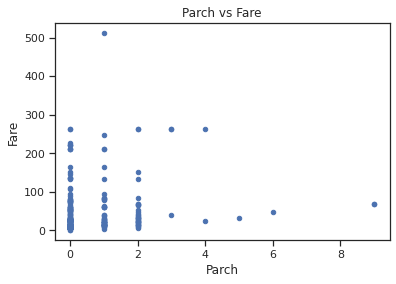

In [61]:
# Scatter Plot between Price and Sales
train.plot(x = 'Parch', y = 'Fare', kind='scatter')
plt.title('Parch vs Fare')
plt.xlabel('Parch')
plt.ylabel('Fare')
plt.show()

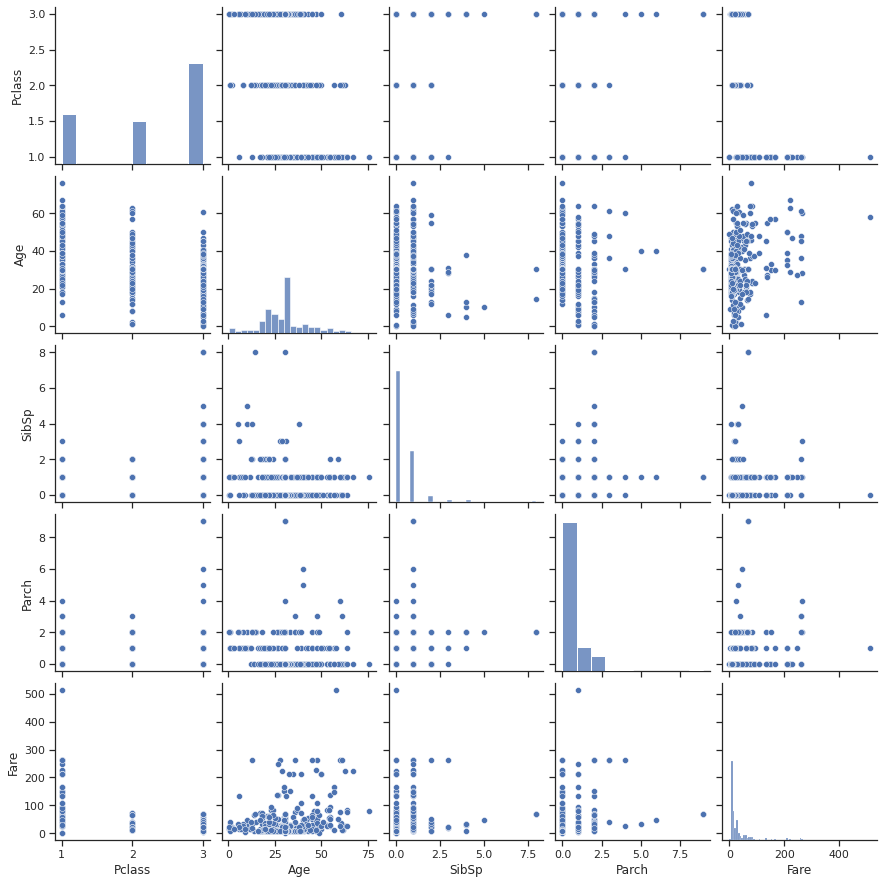

In [52]:
sns.pairplot(train, kind = 'scatter', dropna = False)
plt.show()

from the train data provided there is no clear or perfect relationship between variable

In [ ]:
# Data Reduction
#

## 7. Implementing the Solution

In [23]:
train.shape

(418, 6)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [25]:
train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [37]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [31]:
# Removing the target column
train_data = train.drop('Sex', axis=1)
y = train['Sex']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(train_data)
X = pca.transform(train_data)
X.shape

(418, 2)

In [32]:
# Convert the data type for 'Sex' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
print(y)

In [35]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

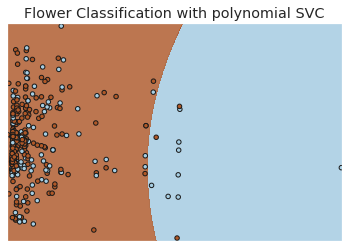

In [39]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [40]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [41]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5595238095238095
[[ 2 37]
 [ 0 45]]


In [42]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [44]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5714285714285714
[[ 3 36]
 [ 0 45]]


In [45]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

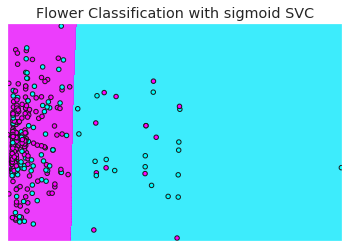

In [46]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Sex Classification with sigmoid SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [1]:
#training the algorithm
#clf = KNeighborsRegressor(11)
#clf.fit(X_train, y_train)

train the knn algorithm on the dataset i have selected

In [141]:
# Making our prediction
# ---
# 
#y_pred = clf.predict(X_test)
#print(mean_squared_error(y_test, y_pred))

1273.2729879934145


however to start out, 5 seems to be the most commonly used value for KNN algorithm.

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?